In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [56]:
df = pd.read_csv("diabetes.csv")

In [57]:
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [58]:
df.tail(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [60]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [61]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


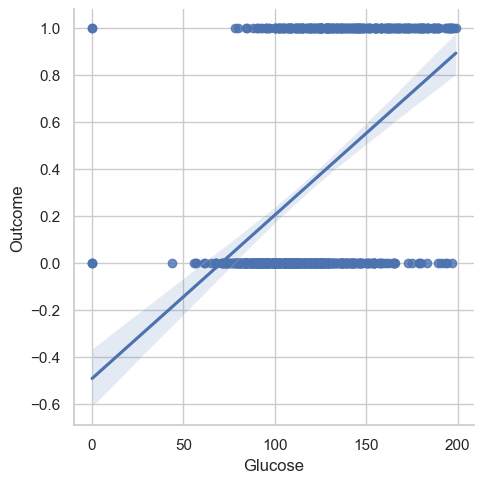

In [62]:
g = sns.lmplot(
    data=df,
    x="Glucose", y="Outcome",
    height=5)

g.set_axis_labels("Glucose", "Outcome")

C:\Users\Guest Account\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Guest Account\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


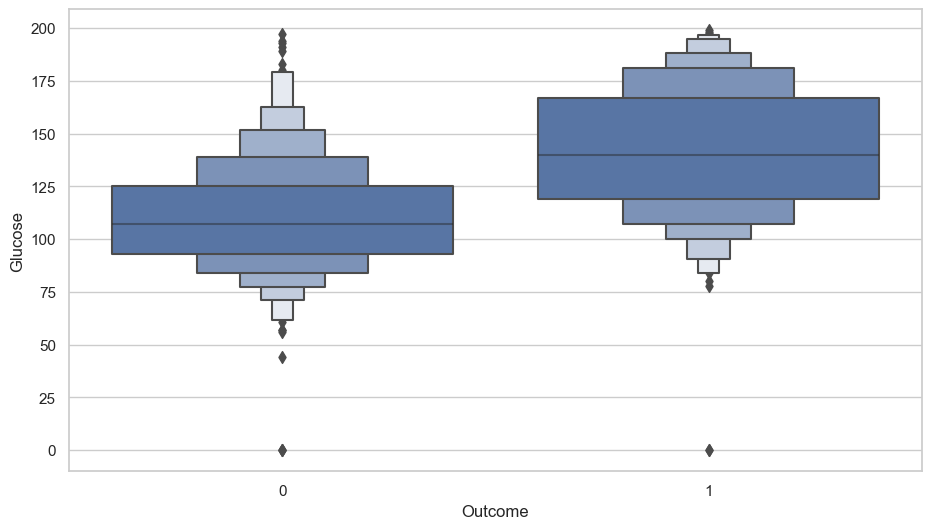

In [63]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(11, 6))
sns.boxenplot( df, x="Outcome", y="Glucose",
    color="b")
plt.show()

C:\Users\Guest Account\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Guest Account\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


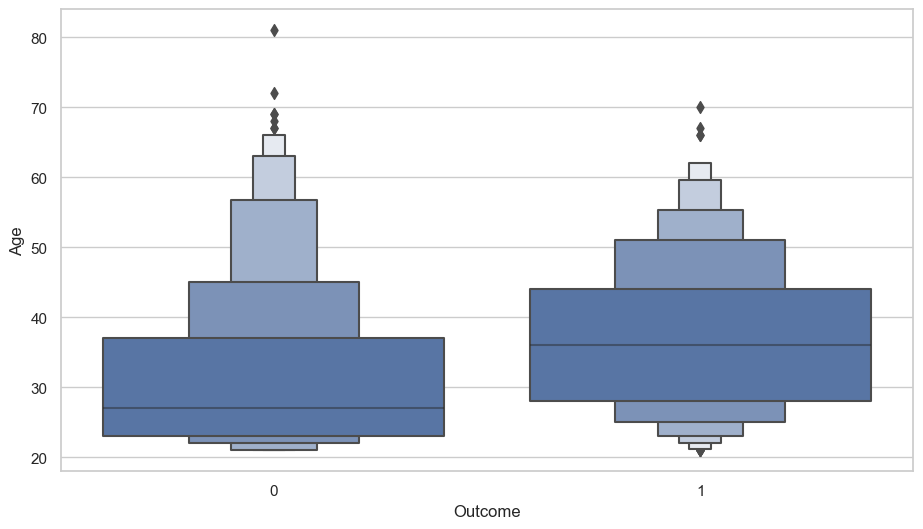

In [64]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(11, 6))
sns.boxenplot( df, x="Outcome", y="Age",
    color="b")
plt.show()

In [65]:
X = df.drop("Outcome", axis= 1)
X.head(9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53


In [66]:
y = df["Outcome"]
y.head(9)

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
Name: Outcome, dtype: int64

In [67]:
df.shape

(768, 9)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [84]:
# Check the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [85]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# Check the transformed data
print("First 5 rows of X_train_scaled:")
print(X_train_scaled[:5])
print("\nFirst 5 rows of X_test_scaled:")
print(X_test_scaled[:5])

First 5 rows of X_train_scaled:
[[-0.23683081 -0.58923279  0.27157654 -1.30288614 -0.71617477 -0.29876846
  -1.09617452 -0.08235977]
 [ 0.36035243 -1.3788891   0.68368156  1.29999107 -0.3405348   0.50519408
  -0.98740134  0.17433516]
 [ 1.25612729 -1.15778533  0.27157654  0.66514297 -0.71617477  0.82422684
  -0.05195197  0.51659507]
 [-0.53542244  1.71656363  0.99276032 -1.30288614 -0.71617477 -1.14101494
  -0.45907445 -0.93800955]
 [ 2.15190216 -0.55764654 -0.03750223  1.23650626 -0.71617477  1.83237035
  -1.08063549  0.77329   ]]

First 5 rows of X_test_scaled:
[[ 0.06176081  0.42152728  0.16855028 -1.30288614 -0.71617477 -1.02616314
  -0.61135691  2.3134596 ]
 [ 0.06176081  2.41146118  0.06552403  1.17302145  5.9380191   0.62004588
   5.76585934 -0.16792475]
 [ 1.25612729  0.95849357  0.47762905  0.72862778  1.16202511  1.41124711
   0.13140853  0.25990014]
 [ 2.7490854  -0.52606029  0.16855028 -1.30288614 -0.71617477 -0.08182619
  -0.02708953  0.43103009]
 [ 0.36035243  0.48469979 

In [87]:
X_train_scaled.std()

1.0

In [88]:
X_test_scaled.std()

1.0565716076543217

In [89]:
X_train_scaled.mean()

-1.4736673698200368e-17

In [90]:
X_test_scaled.mean()

0.04882981304749151

In [91]:
clf = svm.SVC(kernel='linear')

In [92]:
clf.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [93]:
y_prediction = clf.predict(X_test_scaled)

In [94]:
y_prediction

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [95]:
accuracy = accuracy_score(y_test, y_prediction)

In [96]:
accuracy

0.8051948051948052

In [100]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = clf.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.36035243  1.43228736  0.16855028 -0.09667475  0.84899179 -0.77093694
   0.3520627   1.5433748 ]]
[1]
The person is diabetic


C:\Users\Guest Account\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
